In [2]:
# ✅ Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# ✅ Step 2: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Class names for display
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


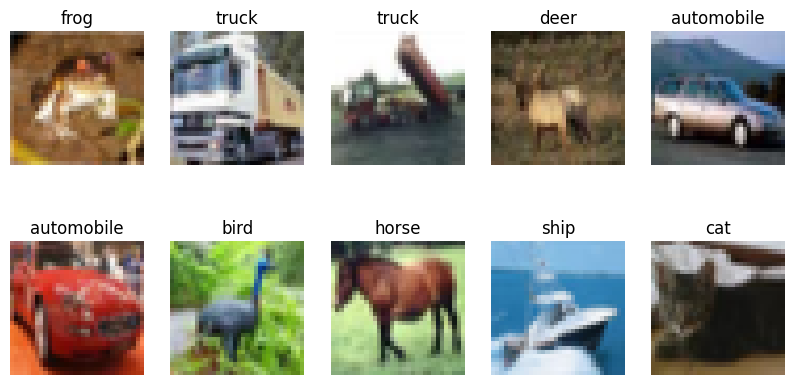

In [4]:
# ✅ Step 3: Visualize Some Images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()


In [5]:
# ✅ Step 4: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [6]:
# ✅ Step 5: Build the CNN Model (Optimized)
model = Sequential([
    Input(shape=(32, 32, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [7]:
# ✅ Step 6: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# ✅ Step 7: Train the Model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 344s 436ms/step - accuracy: 0.2488 - loss: 2.1369 - val_accuracy: 0.4735 - val_loss: 1.4389
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 330s 422ms/step - accuracy: 0.3751 - loss: 1.6530 - val_accuracy: 0.4496 - val_loss: 1.5075
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 341s 435ms/step - accuracy: 0.4554 - loss: 1.4777 - val_accuracy: 0.4542 - val_loss: 1.8657
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 331s 423ms/step - accuracy: 0.5247 - loss: 1.3210 - val_accuracy: 0.6152 - val_loss: 1.0795
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 340s 434ms/step - accuracy: 0.5774 - loss: 1.2031 - val_accuracy: 0.6137 - val_loss: 1.1097
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 333s 426ms/step - accuracy: 0.6145 - loss: 1.1072 - val_accuracy: 0.6618 - val_loss: 1.0318
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 334s 427ms/step - accuracy: 0.6382 - loss: 1.0442 - val_accuracy: 0.7068 - val_loss: 0.8570
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 347s 443ms/step - accuracy: 0.6578 - loss: 0.99

In [9]:
# ✅ Step 8: Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.7221 - loss: 0.8505
Test Accuracy: 0.7250000238418579


In [15]:
# ✅ Step 9: Save the Model
model.save("model.keras")  # ← Native Keras format


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


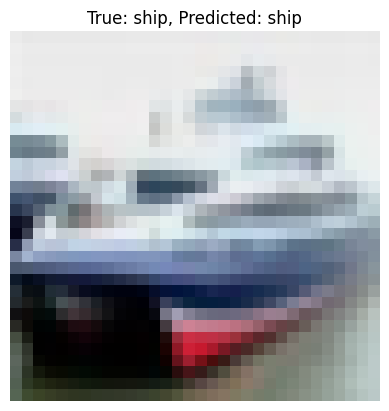

In [13]:
# ✅ Step 10: Predict and Show a Sample
index = 1  # Change to test different images
image = x_test[index]
true_label = np.argmax(y_test[index])
predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)))

plt.imshow(image)
plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()
